In [1]:
import qe_suite.format as f
import numpy as np
import xml.etree.ElementTree as ET

tree = ET.parse('./qe_suite.xml')
root = tree.getroot()

In [2]:
for child in root:
    print(child.tag, child.attrib)

general_info {}
parallel_info {}
input {}
output {}
exit_status {}
timing_info {}
closed {'DATE': ' 8 Mar 2022', 'TIME': '16: 2:28'}


In [3]:
bs   = root.find("output/band_structure");
Ry2eV= 13.605684958731;
EF   = float( root.find("output/band_structure/fermi_energy").text )*Ry2eV;
print(EF)


-0.903964244175744


In [4]:
kpoints= [(x.find("k_point").text).split(" ") for x in bs.iter("ks_energies")]
eigvals= [f.remove_empty((eigv.find("eigenvalues").text.replace("\n","")).split(" ")) for eigv in bs.iter("ks_energies")]
eigvals= np.array(eigvals, dtype=float).T*Ry2eV - EF;
kpoints= np.array(kpoints, dtype=float);
kpath =  np.insert( np.cumsum( np.linalg.norm( np.diff( kpoints, axis=0 ), axis=1 ) ),0,0)

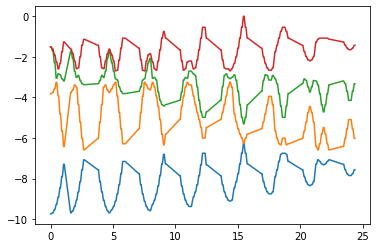

In [6]:
import matplotlib.pyplot as plt
for eig in eigvals:
    plt.plot(kpath,eig)
#plt.ylim(-3,3)

In [233]:
EF

-2.352151836584574

In [234]:

eigvals = [ f.remove_empty(eigval.text.replace("\n","").split(" ")) for eigval in band_structure.iter("eigenvalues") ]
eigvals = np.array(eigvals, dtype=float );
print(eigvals.shape)
#eigenvals = [f.remove_double(" ",eigval.text).split("\n") for eigval in band_structure.iter("eigenvalues") ]
#eigenvals = [f.remove_empty(eigenval) for eigval in band_structure.iter("eigenvalues") ]

#print( eigenvals  )
 #   #print( f.remove_double("\n",f.remove_double(" ",eigval.text) ) )

(80, 36)


In [235]:
kpts.shape

(80, 9)